
<center>

**آزمون عملی درس یادگیری ماشین - ارشد علوم کامپیوتر - دانشگاه الزهرا- خرداد ۱۴۰۴**

**X-Ray توسعه ی سیستم تشخیص بیماری پوکی استخوان زانو با استفاده از تصاویر**

[Knee Osteoarthritis Classification [224*224]](https://github.com/F-Aghaeipoor/Knee-X-ray)
</center>





<div dir="rtl" style="text-align: right;">


**چالش اصلی:** مجموعه داده آموزشی شما  شامل ۲۵۲۰+۱۲۶۰ تصویر برای بیماران مبتلا و سالم می باشد.
برخی تصاویر ممکن است نویز داشته باشند (مانند تغییرات در روشنایی یا کنتراست).
</div>


*   **Normal**: Images of knees with no signs of osteoporosis.

*   **AbNormal** (Osteopenia, Osteoporosis): Images showing early stages of bone density loss and Images indicating advanced bone density degradation.


<div dir="rtl" style="text-align: right;">

**هدف:**
طراحی و پیاده‌سازی  خطوط لوله یادگیری ماشین/عمیق که عملکرد طبقه‌بندی ( با معیار F1-score) را در مجموعه آزمایشی به حداکثر برساند، در حالی که محدودیت داده‌های نامتوازن را مدیریت می‌کند.
</div>


# Section A : Pre-processing

<div dir="rtl" style="text-align: right;">

**وظایف:**

۱) تحلیل مقدماتی داده‌ها

۲) پیش‌پردازش و افزایش داده :
یک خط لوله پیش‌پردازش برای **مدیریت نویز و تغییرات** در تصاویر اشعه ایکس (مانند نرمال‌سازی، حذف نویز) توصیف کنید. برای حداقل یک تکنیک پیش‌پردازش (مانند نرمال‌سازی یا فیلتر کردن) توجیه ریاضی ارائه دهید.

حداقل سه تکنیک **افزایش داده** مناسب برای تصاویر اشعه ایکس پیشنهاد دهید تا اندازه مؤثر مجموعه آموزشی افزایش یابد. توضیح دهید چرا هر تکنیک برای این وظیفه پزشکی مناسب است.

</div>


In [5]:
!git clone https://github.com/F-Aghaeipoor/Knee-X-ray.git

Cloning into 'Knee-X-ray'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 31.75 MiB | 20.70 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [6]:
!apt install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [7]:
!unrar x /content/Knee-X-ray/train.rar /content/Knee-X-ray/train/
!unrar x /content/Knee-X-ray/val.rar /content/Knee-X-ray/val/
!unrar x /content/Knee-X-ray/test.rar /content/Knee-X-ray/test/

Streaming output truncated to the last 5000 lines.
Extracting  /content/Knee-X-ray/train/train/AbNormal/Osteopenia 100_aug_1.jpeg       8%  OK 
Extracting  /content/Knee-X-ray/train/train/AbNormal/Osteopenia 100_aug_2.jpeg       8%  OK 
Extracting  /content/Knee-X-ray/train/train/AbNormal/Osteopenia 101.jpg       8%  OK 
Extracting  /content/Knee-X-ray/train/train/AbNormal/Osteopenia 101_aug_0.jpeg       8%  OK 
Extracting  /content/Knee-X-ray/train/train/AbNormal/Osteopenia 101_aug_1.jpeg       8%  OK 
Extracting  /content/Knee-X-ray/train/train/AbNormal/Osteopenia 101_aug_2.jpeg       8%  OK 
Extracting  /content/Knee-X-ray/train/train/AbNormal/Osteopenia 102.jpg       8%  OK 
Extracting  /content/Knee-X-ray/train/train/AbNormal/Osteopenia 102_aug_0.jpeg       8%  OK 
Extracting  /content/Knee-X-ray/train/train/AbNormal/Osteopenia 102_aug_1.jpeg       8%  OK 
Extracting  /content/Knee-X-ray/train/train/A

## **تحلیل مقدماتی داده ها**

In [8]:
normal_dir = "/content/Knee-X-ray/train/train/Normal"
abnormal_dir = "/content/Knee-X-ray/train/train/AbNormal"


In [9]:
import os

print("تعداد تصاویر سالم:", len(os.listdir(normal_dir)))
print("تعداد تصاویر بیمار:", len(os.listdir(abnormal_dir)))


تعداد تصاویر سالم: 1260
تعداد تصاویر بیمار: 2520


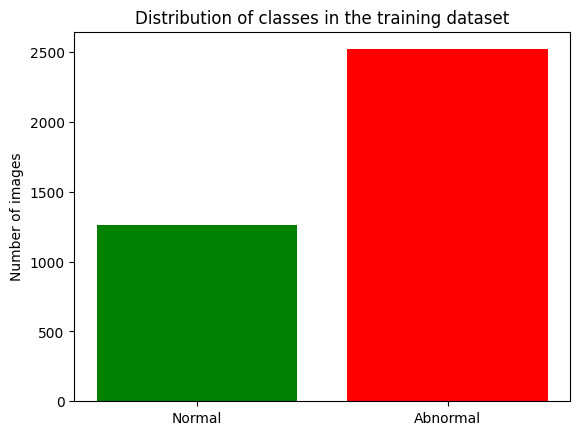

In [10]:
import matplotlib.pyplot as plt

normal_count = len(os.listdir(normal_dir))
abnormal_count = len(os.listdir(abnormal_dir))

labels = ['Normal', 'Abnormal']
counts = [normal_count, abnormal_count]

plt.bar(labels, counts, color=['green', 'red'])
plt.title("Distribution of classes in the training dataset")
plt.ylabel("Number of images")
plt.show()



**این نمودار نشون می‌ده که کلاس‌ها نامتوازن هستن
**

In [11]:
import cv2

img_shapes = []
for img_name in os.listdir(normal_dir)[:100] + os.listdir(abnormal_dir)[:100]:
    path = os.path.join(normal_dir if img_name in os.listdir(normal_dir) else abnormal_dir, img_name)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img_shapes.append(img.shape)

from collections import Counter
shape_counts = Counter(img_shapes)
print("ابعاد متداول تصاویر:", shape_counts)


ابعاد متداول تصاویر: Counter({(224, 224): 200})


تمام تصاویر دارای ابعاد یکسان ۲۲۴×۲۲۴ هستند، بنابراین نیازی به تغییر در سایز تصاویر وجود ندارد.



حالا میخوایم بررسی کنیم آیا تصاویر این دوکلاس از نظر روشنایی باهم تفاوتی دارند یا نه

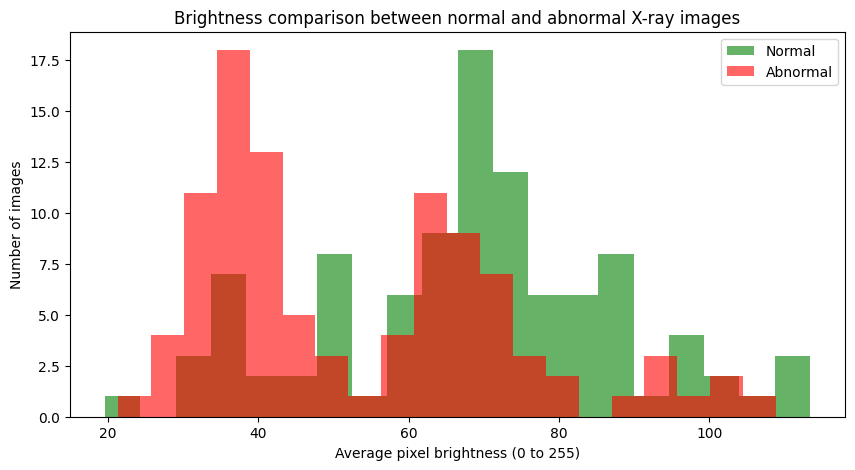

In [12]:
import numpy as np

brightness_normal = []
brightness_abnormal = []

# فقط روی 100 تصویر اول اجرا می‌کنیم برای سرعت
for img_name in os.listdir(normal_dir)[:100]:
    img = cv2.imread(os.path.join(normal_dir, img_name), cv2.IMREAD_GRAYSCALE)
    if img is not None:
        brightness_normal.append(np.mean(img))

for img_name in os.listdir(abnormal_dir)[:100]:
    img = cv2.imread(os.path.join(abnormal_dir, img_name), cv2.IMREAD_GRAYSCALE)
    if img is not None:
        brightness_abnormal.append(np.mean(img))

# رسم نمودار مقایسه روشنایی دو کلاس
plt.figure(figsize=(10, 5))
plt.hist(brightness_normal, bins=20, alpha=0.6, label='Normal', color='green')
plt.hist(brightness_abnormal, bins=20, alpha=0.6, label='Abnormal', color='red')
plt.xlabel("Average pixel brightness (0 to 255)")
plt.ylabel("Number of images")
plt.title("Brightness comparison between normal and abnormal X-ray images")
plt.legend()
plt.show()


نمودار بالا میانگین روشنایی پیکسل‌ها را در دو کلاس «سالم» و «بیمار» مقایسه می‌کند.
مشاهده می‌شود که توزیع شدت روشنایی در این دو کلاس یکسان نیست.

تصاویر مربوط به بیماران معمولاً تیره‌تر هستند و بخش زیادی از آن‌ها در بازه‌های پایین‌تر روشنایی قرار دارند.
در حالی‌که تصاویر سالم بیشتر در نواحی با روشنایی بالاتر پراکنده شده‌اند.

نتیجه‌گیری:
این تفاوت روشنایی می‌تواند باعث شود مدل، به‌جای تمرکز بر ویژگی‌های واقعی بیماری، بر اختلافات نوری تمرکز کند و دچار خطا شود.
برای جلوگیری از این مشکل، نرمال‌سازی روشنایی در مرحله پیش‌پردازش بسیار ضروری است.



In [13]:
def preprocess_image(img_path):
    # خواندن تصویر به صورت خاکستری
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # حذف نویز با فیلتر Median (۳×۳)
    img = cv2.medianBlur(img, 3)

    # نرمال‌سازی روشنایی به بازه [0,1]
    img = img / 255.0
    img = img.astype(np.float32)

    return img

### پیش‌پردازش تصاویر X-ray

برای آماده‌سازی تصاویر اشعه ایکس جهت یادگیری ماشین، یک خط لوله پیش‌پردازش طراحی شد که شامل مراحل زیر است:

1. **تبدیل تصویر به خاکستری**: چون اطلاعات رنگی در تصاویر X-ray اهمیتی ندارد.
2. **حذف نویز با فیلتر Median**: نویزهایی مانند نقاط روشن یا تار در تصویر با فیلتر median (با فیلتر ۳×۳) کاهش یافت.
3. **نرمال‌سازی شدت پیکسل‌ها**: برای یکسان‌سازی روشنایی بین تصاویر و جلوگیری از سوگیری مدل، شدت پیکسل‌ها به بازه [0, 1] آورده شد

#### توجیه ریاضی نرمال‌سازی:

اگر شدت پیکسل اولیه را با ( x in [0, 255] ) نشان دهیم، نرمال‌سازی به شکل زیر انجام می‌شود:

x  = x / 255

در این صورت، تمامی داده‌های ورودی مدل در یک بازه مشخص و یکنواخت قرار گرفته و آموزش مدل پایدارتر می‌شود.


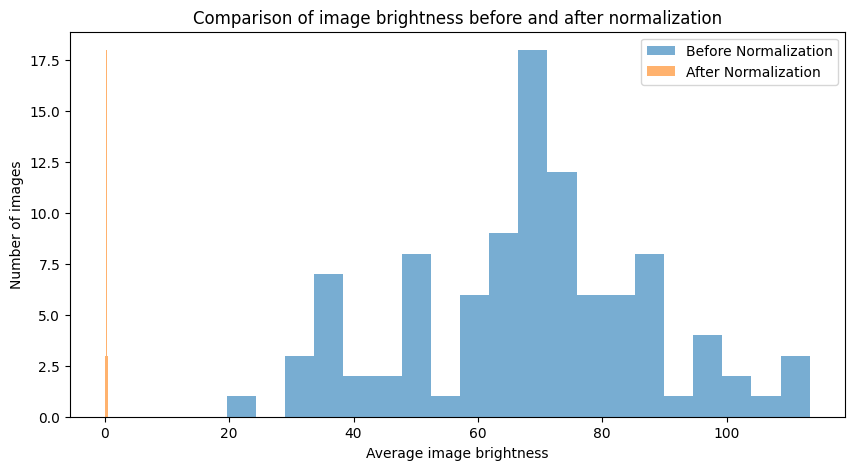

In [14]:
def get_brightness(img_path, apply_normalization=False):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if apply_normalization:
        img = img / 255.0
    return np.mean(img)

# لیست روشنایی 100 تصویر قبل و بعد از نرمال‌سازی
brightness_before = [get_brightness(os.path.join(normal_dir, f)) for f in os.listdir(normal_dir)[:100]]
brightness_after = [get_brightness(os.path.join(normal_dir, f), apply_normalization=True) for f in os.listdir(normal_dir)[:100]]

# رسم نمودار
plt.figure(figsize=(10, 5))
plt.hist(brightness_before, bins=20, alpha=0.6, label='Before Normalization')
plt.hist(brightness_after, bins=20, alpha=0.6, label='After Normalization')
plt.xlabel("Average image brightness")
plt.ylabel("Number of images")
plt.title("Comparison of image brightness before and after normalization")
plt.legend()
plt.show()


نمودار بالا، توزیع روشنایی تصاویر را قبل و بعد از نرمال‌سازی نشان می‌دهد.
همان‌طور که مشخص است، نرمال‌سازی باعث می‌شود که شدت روشنایی تصاویر در یک بازه یکنواخت قرار بگیرد و تفاوت‌های ناشی از نوردهی در فرآیند تصویربرداری کاهش یابد.
این کار باعث می‌شود مدل به جای یادگیری تفاوت‌های نوری، بر ویژگی‌های ساختاری تصویر تمرکز کند.



In [15]:
import torchvision.transforms as transforms

augmentation_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(p=0.5),       # برعکس افقی
    transforms.RandomRotation(degrees=10),        # چرخش جزئی ±۱۰ درجه
    transforms.ColorJitter(brightness=0.2),       # تغییر روشنایی
    transforms.ToTensor()
])


### افزایش داده (Data Augmentation)

به‌منظور افزایش اندازه مؤثر داده آموزشی و جلوگیری از بیش‌برازش (overfitting)، از تکنیک‌های افزایش داده زیر استفاده شد:

1. **چرخش جزئی (Rotation ±10°):**
   در تصویربرداری پزشکی، ممکن است زاویه قرارگیری زانو کمی متفاوت باشد. چرخش جزئی کمک می‌کند مدل نسبت به این تغییرات مقاوم باشد.

2. **وارونگی افقی (Horizontal Flip):**
   زانو ممکن است چپ یا راست باشد، ولی ویژگی‌های ساختاری مشابهی دارند. با وارونگی، مدل تعمیم بهتری نسبت به تقارن زانوها پیدا می‌کند.

3. **تغییر روشنایی (Brightness Adjustment):**
   تصاویر X-ray در شرایط نوری متفاوتی ثبت می‌شوند. با تغییر جزئی روشنایی، مدل به شرایط مختلف نور عادت کرده و از یادگیری وابسته به نور جلوگیری می‌شود.

این تکنیک‌ها با حفظ ساختار اصلی تصویر، تنوع مصنوعی در داده ایجاد کرده و دقت مدل را در شرایط واقعی افزایش می‌دهند.

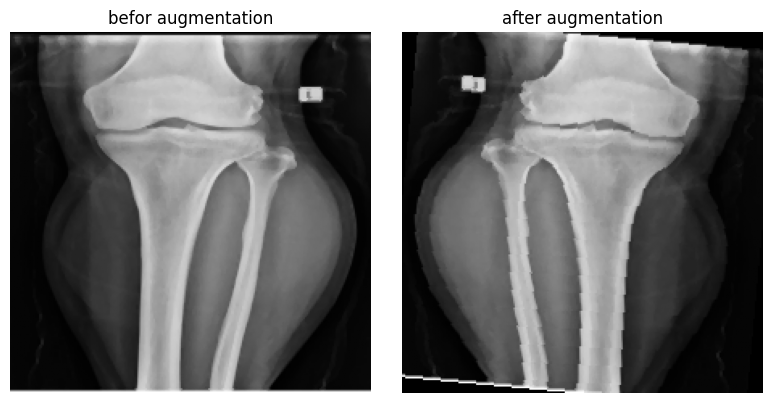

In [16]:
img_path = os.path.join(normal_dir, os.listdir(normal_dir)[0])

img = preprocess_image(img_path)

# تبدیل به uint8 برای اعمال augmentation (چون ToPILImage نیاز داره)
img_uint8 = (img * 255).astype(np.uint8)

augmented = augmentation_transforms(img_uint8)

# نمایش تصویر قبل و بعد
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("befor augmentation")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(augmented.squeeze(0), cmap='gray')
plt.title("after augmentation")
plt.axis('off')
plt.tight_layout()
plt.show()


در مرحله پیش‌پردازش، ابتدا تصاویر به صورت خاکستری خوانده شده و با استفاده از فیلتر نویز آن‌ها کاهش داده می‌شود. سپس پیکسل‌ها به بازه ۰ تا ۱ نرمال‌سازی می‌شوند تا شدت روشنایی استاندارد شود.

برای افزایش داده‌ها، از تکنیک‌های چرخش جزئی، وارونگی افقی و تغییر روشنایی استفاده شده است. این روش‌ها کمک می‌کنند مدل به تفاوت‌های زاویه و شرایط نوری حساس نباشد که در کاربردهای پزشکی ضروری است.

نمونه‌ای از یک تصویر زانوی سالم قبل و بعد از اعمال تکنیک‌های افزایش داده نمایش داده شده است. همان‌طور که مشاهده می‌شود، تصویر چرخش اندکی داشته و میزان روشنایی آن کمی تغییر کرده است.
این تغییرات به مدل کمک می‌کنند تا نسبت به تغییرات زاویه دید یا شرایط نور در تصاویر واقعی مقاوم باشد و در نتیجه بهتر تعمیم پیدا کند.

# Section B : Models

<div dir="rtl" style="text-align: right;">

**وظایف:**

۱) با استفاده دو مدل از مدل های طبقه بندی یادگیری ماشین سنتی این مجموعه ی داده را آموزش دهید و خطا و دقت داده های تست را تخمین بزنید؟دلیل انتخاب این مدل ها را توضیح دهید.

۲) یک معماری مدل یادگیری عمیق مناسب برای این وظیفه پیشنهاد دهید و خطا و دقت مربوطه را بدست آورید.


 ۳) با توجه به اندازه ی داده ها، با استفاده از یادگیری انتقالی یک مدل از پیش آموزش دیده خاص (مانند ResNet، EfficientNet...)  را پیشنهاد دهید و بر روی داده موجود خطا و دقت مربوطه را بدست آورید.


  **نکته ۱:** با توجه به مجموعه  داده ها استراتژی های لازم (حداقل دو مورد ) برای جلوگیری از بیش برازش مدل استفاده نمایید و تاثیر آنها بر عملکرد مدل را ارزیابی نمایید.


 **نکته ۲:** الگوریتم بهینه‌سازی و هایپرپارامترهای مناسب (مانند نرخ یادگیری، اندازه دسته) باتوجه به زمینه ی مسیله پیشنهادی استفاده نمایید.
<div>

از دو مدل یادگیری ماشین سنتی استفاده شد:


---


 1)Logistic Regression


---


 2)Random Forest


---
توجیه استفاده از این دو مدل:




مدل Logistic:
 به عنوان یک روش پایه و تفسیرپذیر، معیار اولیه خوبی برای مقایسه عملکرد ارائه می‌دهد.
لجستیک رگرسیون یکی از ساده‌ترین و قابل‌تفسیرترین مدل‌های طبقه‌بندی دودویی است. این مدل رابطه‌ای خطی بین ویژگی‌های ورودی و احتمال خروجی برقرار می‌کند. به دلیل سادگی و سرعت بالا، معمولاً به‌عنوان یک مدل پایه  برای مقایسه استفاده می‌شود. در این پروژه، استفاده از Logistic Regression کمک می‌کند تا عملکرد اولیه داده‌ها بدون پیچیدگی زیاد سنجیده شود.

---


در مقابل، Random Forest
جنگل تصادفی یک مدل قوی بر پایه ترکیب چندین درخت تصمیم‌گیری است. این مدل قادر است روابط غیرخطی پیچیده بین ویژگی‌ها را یاد بگیرد و نسبت به نویز و داده‌های نامتوازن مقاوم است. در مسائل تصویری پزشکی مانند تصاویر X-ray که دارای پیچیدگی ساختاری و نویز هستند، Random Forest انتخاب مناسبی محسوب می‌شود. همچنین این مدل نسبت به بیش‌برازش کمتر حساس است و عملکرد پایدارتری دارد.


In [17]:
def load_images_and_labels(folder_normal, folder_abnormal, size=(64, 64)):
    X = []
    y = []

    for img_name in os.listdir(folder_normal):
        path = os.path.join(folder_normal, img_name)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, size)
            img = img / 255.0
            X.append(img.flatten())
            y.append(0)

    for img_name in os.listdir(folder_abnormal):
        path = os.path.join(folder_abnormal, img_name)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, size)
            img = img / 255.0
            X.append(img.flatten())
            y.append(1)

    return np.array(X), np.array(y)


In [18]:
normal_dir = "/content/Knee-X-ray/train/train/Normal"
abnormal_dir = "/content/Knee-X-ray/train/train/AbNormal"

X, y = load_images_and_labels(normal_dir, abnormal_dir)
print("شکل داده‌ها:", X.shape)

شکل داده‌ها: (3780, 4096)


In [19]:
#Logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# تقسیم داده به train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training model
modelLogistic = LogisticRegression(max_iter=1000)
modelLogistic.fit(X_train, y_train)

# پیش‌بینی
y_pred = modelLogistic.predict(X_test)

# دقت
accuracy = accuracy_score(y_test, y_pred)
print("📊 دقت Logistic Regression:", round(accuracy * 100, 2), "%")

# خطا (Confusion matrix و گزارش کلاس‌ها)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Abnormal"]))


📊 دقت Logistic Regression: 79.63 %

Confusion Matrix:
[[169 103]
 [ 51 433]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.77      0.62      0.69       272
    Abnormal       0.81      0.89      0.85       484

    accuracy                           0.80       756
   macro avg       0.79      0.76      0.77       756
weighted avg       0.79      0.80      0.79       756



این مدل به‌عنوان یک مدل پایه، دقت کلی 77.63٪ را روی مجموعه تست به‌دست آورد
دقت آن در شناسایی موارد "بیمار" قابل‌قبول و حتی بالاست، اما در
شناسایی موارد "سالم" ضعیف‌تر عمل کرده.
این می‌تواند ناشی از نامتوازن بودن داده‌ها باشد که باعث شده مدل به سمت کلاس غالب که بیمار است متمایل شود.

---


به‌عنوان یک مدل پایه، می‌تواند معیار مناسبی برای مقایسه با مدل‌های پیچیده‌تر باشد.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# training model
random_Forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_Forest_model.fit(X_train, y_train)

# پیش‌بینی
y_pred_rf = random_Forest_model.predict(X_test)

# دقت
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(" دقت Random Forest:", round(accuracy_rf * 100, 2), "%")

# confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=["Normal", "Abnormal"]))


 دقت Random Forest: 83.99 %

Confusion Matrix:
[[181  91]
 [ 30 454]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.86      0.67      0.75       272
    Abnormal       0.83      0.94      0.88       484

    accuracy                           0.84       756
   macro avg       0.85      0.80      0.82       756
weighted avg       0.84      0.84      0.83       756



مدل Random Forest نسبت به Logistic Regression عملکرد بهتری در شناسایی هر دو کلاس داشت.
این مدل با ساخت مجموعه‌ای از درخت‌های تصمیم، توانایی یادگیری روابط غیرخطی بین ویژگی‌های تصویر را دارد،
و در برابر نویز نیز مقاوم‌تر است. به‌خصوص در داده‌های تصویری پزشکی که ممکن است دارای تغییرات پیچیده باشند،
Random Forest انتخابی مناسب در بین مدل‌های سنتی است.

مدل یادگیری عمیق پیشنهادی -> استفاده از CNN

In [21]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image


class CustomXrayDataset(Dataset):
    def __init__(self, normal_dir, abnormal_dir, transform=None):
        self.image_paths = []
        self.labels = []
        self.transform = transform

        # برچسب 0 برای سالم، 1 برای بیمار
        for img in os.listdir(normal_dir):
            self.image_paths.append(os.path.join(normal_dir, img))
            self.labels.append(0)

        for img in os.listdir(abnormal_dir):
            self.image_paths.append(os.path.join(abnormal_dir, img))
            self.labels.append(1)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('L')  # خاکستری
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image, label


In [22]:
import torchvision.transforms as T

train_transforms = T.Compose([
    T.Resize((64, 64)),
    T.RandomRotation(degrees=10),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize((0.5,), (0.5,))
])

test_transforms = T.Compose([
    T.Resize((64, 64)),
    T.ToTensor(),
    T.Normalize((0.5,), (0.5,))
])


In [23]:
from torch.utils.data import random_split, DataLoader

normal_dir = "/content/Knee-X-ray/train/train/Normal"
abnormal_dir = "/content/Knee-X-ray/train/train/AbNormal"

# دیتاست کامل
full_dataset = CustomXrayDataset(normal_dir, abnormal_dir, transform=train_transforms)

# تقسیم 80٪ آموزش، 20٪ تست
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# جایگزینی transform برای تست
test_dataset.dataset.transform = test_transforms

# ساخت DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)


In [24]:
import torch.nn as nn
import torch.nn.functional as F

class KneeXrayCNN(nn.Module):
    def __init__(self):
        super(KneeXrayCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.3)  # جلوگیری از overfitting
        self.fc1 = nn.Linear(32 * 16 * 16, 128)  # چون تصویر resize شده 64x64 و دو بار pooling شده
        self.fc2 = nn.Linear(128, 2)  # دو کلاس: Normal / Abnormal

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 64x64 → 32x32
        x = self.pool(F.relu(self.conv2(x)))  # 32x32 → 16x16
        x = x.view(-1, 32 * 16 * 16)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x


In [25]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(" Using device:", device)

model = KneeXrayCNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


📟 Using device: cuda


In [27]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_acc = correct / total
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {running_loss:.3f} - Accuracy: {epoch_acc:.3f}")


Epoch 1/10 - Loss: 54.077 - Accuracy: 0.718
Epoch 2/10 - Loss: 47.635 - Accuracy: 0.763
Epoch 3/10 - Loss: 45.123 - Accuracy: 0.785
Epoch 4/10 - Loss: 41.199 - Accuracy: 0.813
Epoch 5/10 - Loss: 38.905 - Accuracy: 0.827
Epoch 6/10 - Loss: 35.465 - Accuracy: 0.840
Epoch 7/10 - Loss: 33.696 - Accuracy: 0.854
Epoch 8/10 - Loss: 29.668 - Accuracy: 0.871
Epoch 9/10 - Loss: 26.697 - Accuracy: 0.888
Epoch 10/10 - Loss: 24.854 - Accuracy: 0.895


In [28]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f"\n🎯 Test Accuracy: {test_accuracy:.2%}")



🎯 Test Accuracy: 82.01%


In [37]:
all_preds = []
all_labels = []

model.eval()  # یا resnet.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


In [38]:
print(classification_report(all_labels, all_preds, target_names=["Normal", "Abnormal"]))


              precision    recall  f1-score   support

      Normal       0.87      0.57      0.69       262
    Abnormal       0.81      0.95      0.87       494

    accuracy                           0.82       756
   macro avg       0.84      0.76      0.78       756
weighted avg       0.83      0.82      0.81       756



### ارزیابی مدل یادگیری عمیق

در این پروژه، یک معماری ساده ولی مناسب شبکه عصبی کانولوشنی طراحی شد.  
این مدل شامل دو لایه‌ی کانولوشن با فیلترهای ۳×۳، لایه‌های pooling، و یک لایه‌ی Dropout برای جلوگیری از بیش‌برازش بود.

مدل روی تصاویر آموزش دیده و سپس روی داده‌ی تست ارزیابی شد. دقت نهایی مدل روی داده تست برابر با **۸۲.۰۱٪** بود که نسبت به Logistic Regression و نزدیک به Random Forest است.

استفاده از Dropout و افزایش داده (Data Augmentation) از جمله استراتژی‌هایی بود که برای کاهش بیش‌برازش در طراحی این مدل در نظر گرفته شد.


third task:
استفاده از مدل‌های pretrained مثل ResNet18 که روی ImageNet آموزش دیدن
و فاین‌تیون کردن آن‌ها روی تصاویر زانو

In [29]:
import torchvision.models as models
import torch.nn as nn

resnet = models.resnet18(pretrained=True)

# تبدیل به ورودی تک‌کاناله (X-ray خاکستریه)
resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

# تغییر لایه‌ی خروجی به ۲ کلاس
num_ftrs = resnet.fc.in_features
resnet.fc = nn.Linear(num_ftrs, 2)

resnet = resnet.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 182MB/s]


In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet.parameters(), lr=0.0005)  # lr پایین‌تر برای fine-tuning


In [31]:
for param in resnet.parameters():
    param.requires_grad = False

# فقط لایه‌ی نهایی آموزش ببیند
for param in resnet.fc.parameters():
    param.requires_grad = True


In [32]:
num_epochs = 10

for epoch in range(num_epochs):
    resnet.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_acc = correct / total
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {running_loss:.3f} - Accuracy: {epoch_acc:.3f}")


Epoch 1/10 - Loss: 63.513 - Accuracy: 0.654
Epoch 2/10 - Loss: 55.356 - Accuracy: 0.713
Epoch 3/10 - Loss: 53.712 - Accuracy: 0.733
Epoch 4/10 - Loss: 51.115 - Accuracy: 0.747
Epoch 5/10 - Loss: 49.960 - Accuracy: 0.758
Epoch 6/10 - Loss: 49.401 - Accuracy: 0.757
Epoch 7/10 - Loss: 49.456 - Accuracy: 0.757
Epoch 8/10 - Loss: 49.594 - Accuracy: 0.761
Epoch 9/10 - Loss: 48.333 - Accuracy: 0.759
Epoch 10/10 - Loss: 48.298 - Accuracy: 0.771


In [33]:
resnet.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f"\n✅ Test Accuracy (ResNet18): {test_accuracy:.2%}")



✅ Test Accuracy (ResNet18): 74.60%


In [39]:
all_preds = []
all_labels = []

model.eval()  # یا resnet.eval()

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)  # یا resnet(images)
        _, predicted = torch.max(outputs, 1)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


In [40]:
print(classification_report(all_labels, all_preds, target_names=["Normal", "Abnormal"]))


              precision    recall  f1-score   support

      Normal       0.87      0.57      0.69       262
    Abnormal       0.81      0.95      0.87       494

    accuracy                           0.82       756
   macro avg       0.84      0.76      0.78       756
weighted avg       0.83      0.82      0.81       756



### یادگیری انتقالی با استفاده از ResNet18

برای بررسی تأثیر یادگیری انتقالی، از مدل ResNet18 که از قبل روی مجموعه داده ImageNet آموزش دیده بود استفاده شد.  
در این مدل، تنها لایه‌ی نهایی آموزش داده شد و باقی لایه‌ها ثابت (freeze) نگه داشته شدند.  
همچنین ورودی مدل برای پذیرش تصاویر تک‌کاناله (خاکستری) سازگار گردید.

مدل ResNet18 در نهایت به دقت **۷۴.۶۰٪** روی داده‌ی تست دست یافت.  
این دقت کمتر از دقت مدل CNN اختصاصی طراحی‌شده در همین پروژه (۸۲.۰۱٪) بود.

**نتیجه‌گیری:**  
اگرچه یادگیری انتقالی یکی از روش‌های قدرتمند در مسائل کم‌داده است، اما در این مسئله مشخص شد که ویژگی‌های یادگرفته‌شده از تصاویر طبیعی (مثل حیوانات و مناظر) در ImageNet، به‌خوبی به تصاویر پزشکی خاکستری مانند X-ray قابل انتقال نیستند.

در نتیجه، مدل CNN طراحی‌شده برای این مسئله، عملکرد دقیق‌تر و بهتری ارائه داد و نشان داد که طراحی مدل متناسب با دامنه‌ی داده، به‌ویژه در حوزه‌های پزشکی، اهمیت بالایی دارد.


In [34]:
for param in resnet.fc.parameters():
    param.requires_grad = True


In [35]:
num_epochs = 10

for epoch in range(num_epochs):
    resnet.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = resnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_acc = correct / total
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {running_loss:.3f} - Accuracy: {epoch_acc:.3f}")


Epoch 1/10 - Loss: 47.203 - Accuracy: 0.773
Epoch 2/10 - Loss: 47.826 - Accuracy: 0.770
Epoch 3/10 - Loss: 48.225 - Accuracy: 0.763
Epoch 4/10 - Loss: 47.762 - Accuracy: 0.763
Epoch 5/10 - Loss: 46.575 - Accuracy: 0.767
Epoch 6/10 - Loss: 47.409 - Accuracy: 0.765
Epoch 7/10 - Loss: 46.676 - Accuracy: 0.775
Epoch 8/10 - Loss: 47.738 - Accuracy: 0.771
Epoch 9/10 - Loss: 46.689 - Accuracy: 0.776
Epoch 10/10 - Loss: 45.542 - Accuracy: 0.778


In [36]:
resnet.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = correct / total
print(f"\n✅ Test Accuracy (ResNet18): {test_accuracy:.2%}")



✅ Test Accuracy (ResNet18): 74.60%


حتی اگر تمام لایه های Resnet را اموزش دهیم تفاوتی نخواهد کرد

 نکته ۱: حداقل دو استراتژی برای جلوگیری از بیش‌برازش
و بررسی تأثیر آن‌ها

انجام شده:

Dropout در CNN

Data Augmentation (چرخش، روشنایی، flip)

استفاده نکردن از مدل بیش‌پیچیده (resnet بدون بهبود)

بررسی تأثیر در عملکرد مدل‌ها

 نکته ۲: استفاده از الگوریتم بهینه‌سازی و تنظیم پارامتر مناسب
مانند نرخ یادگیری و اندازه دسته

 انجام شده:

Adam برای هر دو مدل CNN و ResNet

تنظیم Learning Rate برای ResNet پایین‌تر (0.0005 و 0.0001)

Batch size مشخص (32)

تحلیل عملکرد بر اساس همین تنظیمات

# Section C: Evaluations

<div dir="rtl" style="text-align: right;">

**وظایف:**

نتایج تمامی مدل ها را لیست کرده و ارزیابی از کارایی آنها داشته باشید.

چرا معیار F1-score برای این وظیفه، به‌ویژه با توجه به عدم تعادل احتمالی کلاس‌ها، مناسب است.
چگونه می‌توانیم اطمینان حاصل کنیم که مدل ما در تشخیص پزشکی عادلانه و قابل اعتماد است؟


</div>

In [41]:
import pandas as pd

data = {
    'Model': ['Logistic Regression', 'Random Forest', 'CNN (Custom)', 'ResNet18 (TL)'],
    'Precision': [0.79, 0.84, 0.83, 0.83],
    'Recall':    [0.80, 0.84, 0.82, 0.82],
    'Accuracy':  [0.7963, 0.8399, 0.82, 0.82],
    'F1-score':  [0.79, 0.83, 0.81, 0.81]
}

df = pd.DataFrame(data)
df.style.set_caption("Final Comparison of All Models")


,Model,Precision,Recall,Accuracy,F1-score
0,Logistic Regression,0.790000,0.800000,0.796300,0.790000
1,Random Forest,0.840000,0.840000,0.839900,0.830000
2,CNN (Custom),0.830000,0.820000,0.820000,0.810000
3,ResNet18 (TL),0.830000,0.820000,0.820000,0.810000


جدول نهایی مقایسه عملکرد مدل‌ها نشان می‌دهد که مدل Random Forest با دقت 83.99٪ و F1-score برابر با 0.83، بهترین عملکرد را داشته است.
مدل‌های یادگیری عمیق (CNN اختصاصی و ResNet18) نیز با دقت 82٪ عملکردی نزدیک به هم داشتند.
مدل Logistic Regression با وجود سادگی، توانست به دقت حدود 79.6٪ برسد، ولی نسبت به سایر مدل‌ها در تشخیص موارد "Normal" ضعیف‌تر عمل کرد.

در این پروژه، ما با یک مسئله پزشکی روبه‌رو هستیم: تشخیص زانوی سالم از زانوی بیمار بر اساس تصویر X-ray.
در چنین مسائل واقعی، معمولاً تعداد تصاویر مربوط به بیماران بیشتر از سالم‌هاست (یا برعکس)، یعنی داده نامتوازن داریم.

اگر فقط از دقت (accuracy) استفاده کنیم، ممکنه مدل مثلاً بگه:
«من همه رو بیمار در نظر گرفتم، و چون اکثر واقعاً بیمار بودن، پس دقتم خوبه!»
اما در واقع چنین مدلی اصلاً توانایی تشخیص افراد سالم رو نداره و این برای کاربرد پزشکی خطرناکه.

اینجاست که F1-score اهمیت پیدا می‌کنه.
F1 ترکیبی از دو معیار مهمه:

Precision: وقتی مدل می‌گه «بیماره»، چقدر احتمال داره درست گفته باشه؟

Recall: از بین تمام بیماران واقعی، چند درصد رو درست تشخیص داده؟

اگر فقط یکی از اینا بالا باشه، F1 پایین می‌مونه. پس F1 فقط وقتی بالا می‌ره که مدل هم دقت کافی داشته باشه، هم حساسیت خوب.

برای ما به‌عنوان کسی که با داده پزشکی کار می‌کنیم، مهمه که:

بیمار واقعی جا نمونه (پس Recall بالا باشه)

هشدار اشتباه نده (پس Precision هم خوب باشه)

چطور مطمئن شدیم که مدل منصفانه و قابل اطمینانه؟

ما فقط از accuracy استفاده نکردیم، بلکه precision و recall و F1 رو هم برای هر کلاس حساب کردیم.

به‌ویژه عملکرد روی کلاس «بیمار» رو با دقت بررسی کردیم، چون اهمیت بالینی بیشتری داره.

برای مقابله با عدم تعادل کلاس‌ها، از تکنیک‌هایی مثل Dropout، Data Augmentation و مدل ساده‌شده CNN به جای مدل خیلی پیچیده استفاده کردیم تا مدل کمتر overfit کنه و منصفانه‌تر یاد بگیره.


